# Problem 1

The Gamma$(α, 1)$ distribution for $α < 1$ is unbounded near zero, causing difficulty finding a dominating density (say, to implement rejection sampling). Prove that if $X ∼$ Gamma$(α + 1, 1)$ and $U ∼ U(0, 1)$ with U and X independent, then $XU^{1/α} ∼$ Gamma$(α, 1)$. Comment on the utility of this result.

We have $H(y) = y^{\alpha}$ as the cdf of a $Y = U^{1/ \alpha}$ random variable $\rightarrow$ a pdf of the form $h(y) = \alpha y^{\alpha -1}$. Additionally note that the pdf of a Gamma$(\alpha+1, 1)$ is

$$ g(x) = \frac{1}{\Gamma({\alpha+1})}x^{\alpha}e^{-x}, \;\;\; x \in (0, \infty)$$

Using the fact that a product distribution $Z=XU^{1/ \alpha}$ has density function 

\begin{equation}
\begin{split}
f(z) &= \int_0^{\infty} f_X(x) f_Y(\frac{z}{x})\frac{1}{|x|}dx \\
&= \frac{\alpha}{\Gamma({\alpha+1})} \int_0^{\infty} \big(\frac{z}{x}\big)^{\alpha} e^{-\frac{z}{x}} x^{\alpha - 1} \frac{1}{x}dx \\
&= \frac{1}{\Gamma({\alpha})} z^{\alpha}e^{-z}  \bigg[\int_0^{\infty} \frac{1}{x^2}e^{-\frac{1}{x}} dx\bigg] \\
&= \frac{1}{\Gamma({\alpha})} z^{\alpha}e^{-z}
\end{split}
\end{equation}

** This is wrong!!!

# Problem 2

In [ ]:
import numpy as np
from scipy.special import erf
from scipy.stats import norm
import matplotlib.pyplot as plt

Let $\phi$ denote the standard normal pdf and $\Phi$ the corresponding cdf.

1. Show that $f(x) = 2\phi(x)\Phi(x) = \phi(x)\big[1 + \text{erf}(\frac{x}{\sqrt{2}})\big]$ is a density on $\mathbb{R}$.

First note that erf(x) is a symmetric about 0 resulting in $\int_{\mathbb{R}} \text{erf}(\frac{x}{\sqrt{2}})dx = 0$.

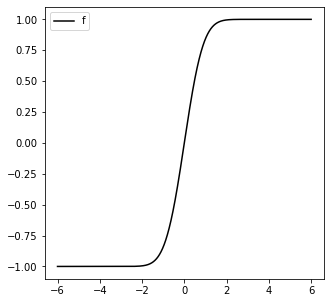

In [ ]:
support = np.linspace(-6,6,100000)
_erf = erf(support)

plt.figure(figsize = (5,5))
plt.plot(support, _erf, color = 'k', label = 'f')
plt.legend()
plt.show()

The integral then reduces to integrating a standard normal pdf. 

\begin{equation*}
\begin{split}
\int_{\mathbb{R}} f(x)dx &= \int_{\mathbb{R}} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} 
\bigg (1 + \Phi \big(\frac{x}{\sqrt{2}} \big)\bigg)dx \\
&=  \int_{\mathbb{R}} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}dx + 0 \\
&= 1
\end{split}
\end{equation*}

2. Describe and implement a rejection sampler to sample from the above density using draws from a standard normal density. Overplay a histogram of iid samples from f with its density plot.

In [ ]:
def f(x):
  return norm.pdf(x)*(1+erf(x/np.sqrt(2)))

def g(x):
  return norm(loc=1/2).pdf(x)

Let $g$ be the pdf corresponding to a $\mathcal{N}(\frac{1}{2}, 1)$ distribution. Additionally, fix $M = 2$ so that $\forall x \in \mathbb{R}$ $f(x) \leq M g(x)$.

Mean paramater $\frac{1}{2}$ and $M$ are chosen from visual inspection. 

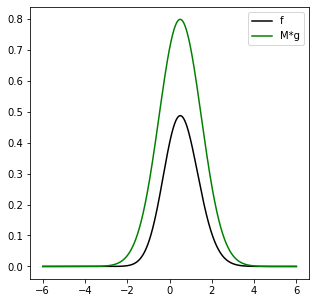

In [ ]:
support = np.linspace(-6,6,100000)
f_pdf = f(support)

M = 2
normal_pdf = M*g(support)

plt.figure(figsize = (5,5))
plt.plot(support, f_pdf, color = 'k', label = 'f')
plt.plot(support, normal_pdf, color = 'g', label = 'M*g')
plt.legend()
plt.show()

In [ ]:
N = 10000
samp_g = np.random.normal(1/2, 1, N)
samp_u = np.random.uniform(0, 1, N)

The algorithm for rejection sampling is as follows.

**Step 1:** Sample $X \sim g$ and $U \sim$ Uniform$\big(0,1\big)$ independently.

**Step 2:** If $U \leq \frac{f(X)}{Mg(X)}$, accept X as a sample from $f$.


In [ ]:
mask = samp_u < f(samp_g)/(M*g(samp_g))
f_samples = samp_g[mask]

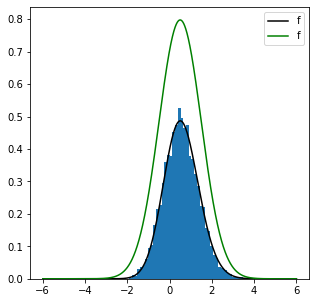

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(support, f_pdf, color = 'k', label = 'f')
plt.plot(support, normal_pdf, color = 'g', label = 'f')
plt.hist(f_samples, density = True, bins = 50)
plt.legend()
plt.show()

In [ ]:
def sim_accept_rate(M_space):
  N = 10000
  rates = []
  for M in M_space:
    samp_g = np.random.normal(1/2, 1, N)
    samp_u = np.random.uniform(0, 1, N)
    mask = samp_u < f(samp_g)/(M*g(samp_g))
    rates.append(len(samp_g[mask])/N)
  return rates

In [ ]:
M_space = np.linspace(1.3, 5, 1000)
rates = sim_accept_rate(M_space)

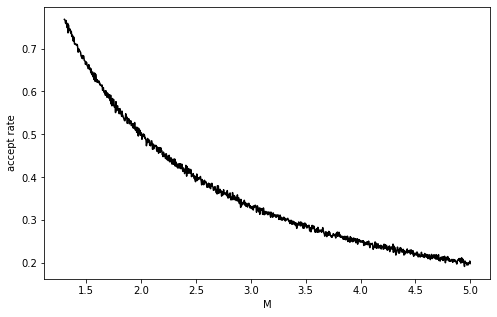

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(M_space, rates, color = 'k')
plt.xlabel('M')
plt.ylabel('accept rate')
plt.show()

# Problem 3

Let $f$ be a density (with respect to the Lebesgue measure) on $\mathbb{R}^d$. Let $A \subset \mathbb{R}^d$ be a measurable set $\int_A f(u)du > 0$. Let $g$ be the density obtained by truncating $f$ to the region $A$, i.e., $g(x) ∝ f(x)\mathbb{1}_{A(x)}$. Suppose we continue to draw i.i.d. samples $X_1, X_2, . . .$ from $f$ until a sample falls inside $A$ for the first time. Let us call this sample $Y$.

(i) Show that $Y ∼ g$. 

[Hint: consider$ P(Y ∈ B)$ for an arbitrary measurable set $B$. condition on $N$ defined in part (ii) to compute this probability]

(ii) Let $N$ be the (random) number of samples needed to be drawn from $f$ to obtain a sample from $g$. Find the distribution of $N$ and its expectation.

We have that $N \sim$ Geometric$(p)$ where $p = \int_A f(u)du$ which allows us to compute the probability that it will take $m$ samples $X_1, . . . , X_m$ from $f$ such that the $m$-th sample is $X_m \in A$.

$$E\big[N\big] = \frac{1}{p}$$

(iii) Use part (i) to complete the proof of the rejection sampling algorithm described in class.

# Problem 4

Suppose our goal is to draw samples from a density $f$ on [0, 1], where

$$ f(x) ∝ e^{−(x+1)^{3/2}} \mathbb{1}_{[0,1]}(x)$$

We would like to implement a rejection sampler to sample from $f$; following the steps below:

(i) Observe that $(x+1)^{3/2} \geq 1 + \frac{3}{2}x$ for all $x ∈ [0, 1]$.

(ii) Note that the density $g(x) ∝ e^{−(1 + \frac{3}{2}x)} \mathbb{1}_{[0,1]}(x)$ is an exponential density truncated to [0, 1].

(iii) We can draw samples from g using the inverse-cdf method.



We have that $\tilde{g}(x) = e^{−(1 + \frac{3}{2}x)}$. First I compute it's normalizing constant and then derive the cdf. 

$$ \int_0^1 e^{−(1 + \frac{3}{2}x)} dx = \frac {2(e^{\frac{3}{2}}- 1)}{3e^{\frac{5}{2}}} = \lambda$$

Giving us the pdf, $g(x) = \frac{1}{\lambda}e^{−(1 + \frac{3}{2}x)}$ and cdf

$$ G(x) = \int_0^x  \frac{1}{\lambda}e^{−(1 + \frac{3}{2}s)}ds = \frac {2(1-e^{-\frac{3}{2}x})}{3e\lambda} $$

In [ ]:
class ExpRV_g:

  lmbda = 2*(np.exp(3/2)-1)/(3*np.exp(5/2))
  
  def pdf(self, x):
    return np.exp(-(1+3/2 * x))/self.lmbda

  def cdf(self, x):
    return 2*(1-np.exp(-3/2 * x))/(3*np.exp(1)*self.lmbda)

  def inverse_cdf(self, u):
    return -(2/3)*np.log(1-3/2*np.exp(1)*self.lmbda*u)

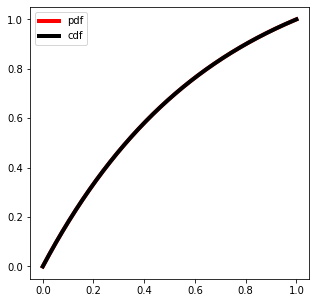

In [ ]:
RV = ExpRV()

support = np.linspace(0, 1, 10000)
g_x = RV.pdf(support)
G_x = RV.cdf(support)

plt.figure(figsize = (5,5))
plt.plot(support, G_x, color = 'r', linewidth = 4, label = 'pdf')
plt.plot(support, G_x, color = 'k', linewidth = 4, label = 'cdf')
plt.legend()
plt.show()

In [ ]:
N = 100000

# Note that G(0) = 0 and G(1) = 1
X = RV.inverse_cdf(U)

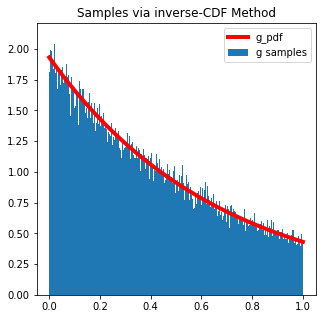

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(support, f_x, color = 'r', linewidth = 4, label = 'g_pdf')
plt.hist(X, bins = 500, density=True, label = 'g samples')
plt.title('Samples via inverse-CDF Method')
plt.legend()
plt.show()

(iv) Use the modification to the rejection sampler which doesn’t require knowledge of the normalizing constant to draw samples from f.

Note that because (i) we have that for $M \geq 1$

\begin{equation}
\begin{split}
e^{-(x+1)^{3/2}} &\leq Me^{-(1 + \frac{3}{2}x)}
\end{split}
\end{equation}

**Algorithm**

$N = \text{Desired number of samples}$

while count < $N$:
1. Sample $X \sim g$ and $U \sim U(0,1)$ independently.
2. If $U \leq \frac{\tilde{f}(X)}{M\tilde{g}(X)} = K$ then accept X as a sample from $f$. Incriment count.

Note that we already know how to sample from $g$ as seen in (iii). Additionally, see that expression in step 2 can be simplified because

$$ \frac{\tilde{f}(X)}{\tilde{g}(X)} = \frac{e^{-(x+1)^{3/2}}}{e^{-(1 + \frac{3}{2}x)}} = e^{-(x+1)^{\frac{3}{2}} + \frac{3}{2}x + 1 }$$

In [ ]:
class Random(ExpRV):
  def __init__(self, M):
    self.M = M
    super().__init__()
  
  def sample(self, X):
    # returns selected samples and acceptance rate
    U = np.random.uniform(0,1, len(X))
    mask = U <= self.K(X, self.M)
    samples = X[mask]
    return samples, len(samples)/len(X)

  def K(self, x, M):
    return np.exp(-(x+1)**(3/2)+3/2*x+1)/M

In [ ]:
M = 1
samples, acceptance_rate = Random(M).sample(X)

Lastly, to check our samples are actually coming from $f$, I derive the pdf of $f$. Need the normalizing constant. it has a complicated form so I just provide the numerical value.

$$ \lambda = \int_0^1 e^{-(x+1)^{3/2}} dx = 0.17746$$

In [ ]:
def f_pdf(x):
  lmbda = 0.17746
  return np.exp(-(x+1)**(3/2))/lmbda

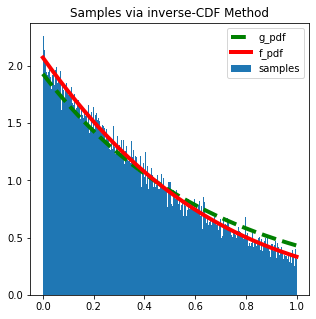

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(support, g_x, color = 'g', linewidth = 4, linestyle = '--', label = 'g_pdf')

plt.plot(support, f_pdf(support), color = 'r', linewidth = 4, label = 'f_pdf')
plt.hist(samples, bins = 500, density=True, label = 'samples')
plt.title('Samples via inverse-CDF Method')
plt.legend()
plt.show()

As we can see, during the sampling process the normalizing constants were not needed! I just used them to verify I was sampling from the correct distribuition. Now lets see what happens to the acceptance rate as we vary $M$. In (v) it is demonstrated that the acceptance rate is equal to the ratio of normalizing constants. Intuitively, if the density functions are from the same family and have the same normalizing constants, then they are the exact same distribution


In [ ]:
M_space = np.linspace(1, 10, 100)

rates = [Random(M).sample(X)[1] for M in M_space]

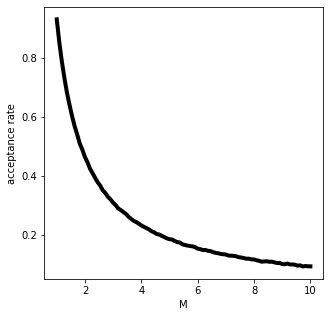

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(M_space, rates, color = 'k', linewidth = 4)
plt.ylabel('acceptance rate')
plt.xlabel('M')
plt.show()

The choice of $g$ proposed in the problem statement is highly optimal in the sense that when $M = 1$ we accept *nearly* every sample. 

(v) What is the acceptance rate of this algorithm?

$$ \alpha = \frac{\int_0^1 e^{-(1 + \frac{3}{2}x)} dx}{\int_0^1  e^{-(x+1)^{3/2}} dx} = \frac{0.17746}{0.1905} = 0.9315
$$